In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = {'tempo': [1, 3, 4, 4, 6, 8, 10, 10, 11, 13],
      'vendas': [91, 110, 106, 116, 119, 129, 139, 143, 138, 159]}
df = pd.DataFrame(df)
df.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


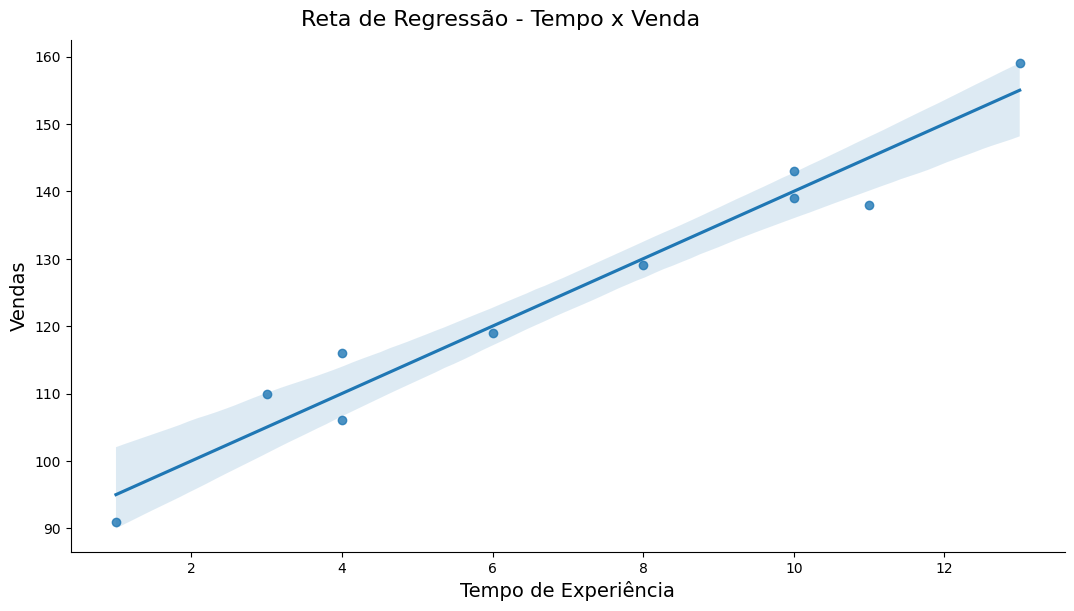

In [3]:
ax = sns.lmplot(x='tempo', y='vendas', data=df)
ax.figure.set_size_inches(12, 6)
ax.figure.suptitle('Reta de Regressão - Tempo x Venda', fontsize=16, y=1.02)
ax.set_ylabels('Vendas', fontsize=14)
ax.set_xlabels('Tempo de Experiência', fontsize=14)

In [4]:
df.corr().round(4)

,tempo,vendas
tempo,1.0000,0.9769
vendas,0.9769,1.0000


In [5]:
import statsmodels.api as sm

In [6]:
y = df['vendas']
X = sm.add_constant(df['tempo'])

In [7]:
model_statsmodel = sm.OLS(y, X).fit()

In [8]:
print(model_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.22e-06
Time:                        09:47:32   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
df['y_previsto'] = model_statsmodel.predict()
df.head()

,tempo,vendas,y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [11]:
df['residuo'] = df['y_previsto'] - df['vendas']
df.head()

,tempo,vendas,y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
